<a href="https://colab.research.google.com/github/Tanishanagori2012/Damping/blob/main/Damping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
a_input = float(input('enter the value of a :' ))
b_input = float(input('enter the value of b :'))
c_input = float(input('enter the value of c :'))
xo = float(input('enter the value of x0 :'))
vo = float(input('enter the value of y0 :'))

In [ ]:
# use this shell for critical case
a_input = 1
b_input = 2
c_input = 1
alpha = (b_input) / (2 * a_input)
beta = math.sqrt(abs((b_input ** 2 / 4 * a_input ** 2) - (c_input / a_input)))
lamda_one = - alpha  + beta
lamda_two = - alpha - beta
xo = 10
vo = 10

In [ ]:
def type_damping(a, b, c):
  """
  This function returns which type of damping will be there on input a, b, c
  >>> type_damping(19,90,100)
  over damped
  >>> type_damping(1,1,90)
  under damped
  >>> type_damping(1,2,1)
  critical damped
  parameter a: coefficient of x
  parameter c: constant 
  parameter b: coefficient of x^2
  precondtion: a,b,c must be of type int
  
  """
  D = b ** 2 - (4 * a * c) #descriminant
  if D > 0: #when roots are different
    return 'Over damped'
  elif D == 0: #roots are equal
    return 'critical damped'
  else: # roots are imaginary, and distinct
    return 'under damped'
print(type_damping(a_input, b_input ,c_input))

critical damped


In [ ]:
lst_t = [i / 10 for i in range(100)]        #accumulator

In [ ]:
def graph(xo,vo):
  """
  Returns : A list of roots of the damping equation
  Parameter xo: it is initial value if x(0)
  Precondition : it must be a numerical value
  Parameter xo: it is initial value if x'(0)
  Precondition : it must be a numerical value

  """
  lst_x = []        #accumulator
  if type_damping(a_input, b_input ,c_input) == 'Over damped':
    d_one = (vo - lamda_two * xo) / (lamda_one - lamda_two)
    d_two = (vo - lamda_one * xo) / (lamda_two - lamda_one)
    for i in range(len(lst_t)):  
      x = d_one * math.exp((-alpha + beta) * lst_t[i]) + d_two * math.exp ((-alpha - beta) * lst_t[i])
      lst_x.append(x)

  elif  type_damping(a_input, b_input ,c_input) == 'critical damped':
    for i in range(len(lst_t)):
      x = math.exp(-b_input * lst_t[i] / (2 * a_input) ) * (xo + (vo - lamda_one * xo) * lst_t[i])
      lst_x.append(x)

  else:
    for i in range(len(lst_t)):
      x = math.exp(-alpha * lst_t[i]) * (xo * math.cos(beta * lst_t[i]) + ((vo +alpha * xo) * math.sin(beta * lst_t[i]) / beta))
      lst_x.append(x) 
  return lst_x



critical damping


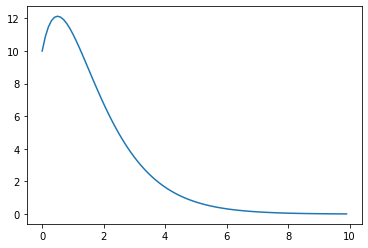

In [ ]:
plt.plot(lst_t,graph(xo,vo))
print('critical damping')

In [ ]:
# over damping
a_input = 1
b_input = 19
c_input = 90
alpha = (b_input) / (2 * a_input)
beta = math.sqrt(abs((b_input ** 2 / 4 * a_input ** 2) - (c_input / a_input)))
lamda_one = - alpha  + beta
lamda_two = - alpha - beta
xo = 1
vo = 100

In [ ]:
lst_t = [i / 100 for i in range(100)]        #accumulator

overdamping


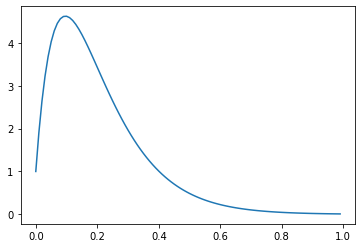

In [ ]:
plt.plot(lst_t,graph(xo,vo))
print('overdamping')

In [ ]:
# under damping
a_input = 1
b_input = 2
c_input = 89
alpha = (b_input) / (2 * a_input)
beta = math.sqrt(abs((b_input ** 2 / 4 * a_input ** 2) - (c_input / a_input)))
lamda_one = - alpha  + beta
lamda_two = - alpha - beta
xo = -100
vo = 100

In [ ]:
lst_t = [i / 100 for i in range(1000)]        #accumulator

underdamping


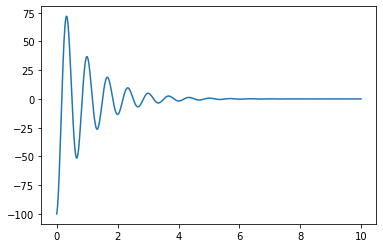

In [ ]:
plt.plot(lst_t,graph(xo,vo))
print('underdamping')